<a href="https://colab.research.google.com/github/treklm/CV/blob/master/python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання даних

In [40]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json=response.json()

Створення :DataFrame


In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка даних


In [ ]:
df["at"] = pd.to_datetime(df["at"])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at": "Дата" , "val": "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [ ]:
df.set_index('Дата', inplace=True)

Побудова графіків


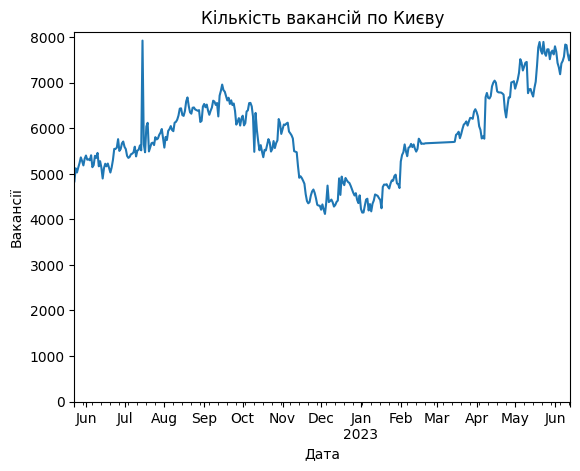

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df["Вакансії"]=df['Вакансії'].replace(0, np.nan)
df['Вакансії']=df["Вакансії"].interpolate()

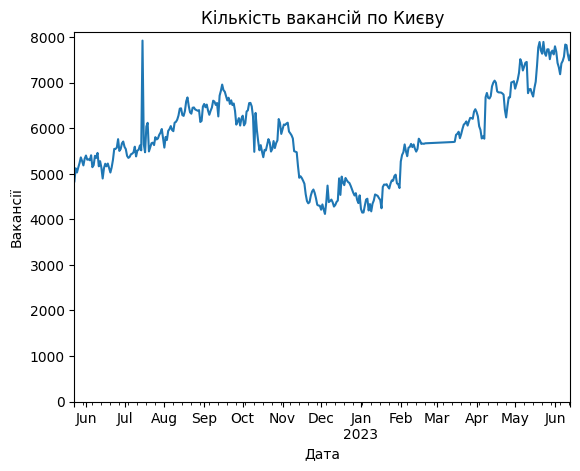

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df['rolling_mean']=df['Вакансії'].rolling(window=7).mean()

In [ ]:
df

,Вакансії,rolling_mean
Дата,,
2022-05-23,4831.0,NaN
2022-05-24,5118.0,NaN
2022-05-25,5025.0,NaN
2022-05-26,5134.0,NaN
2022-05-27,5233.0,NaN
...,...,...
2023-06-09,7833.0,7462.285714
2023-06-10,7818.0,7517.857143
2023-06-11,7618.0,7558.571429


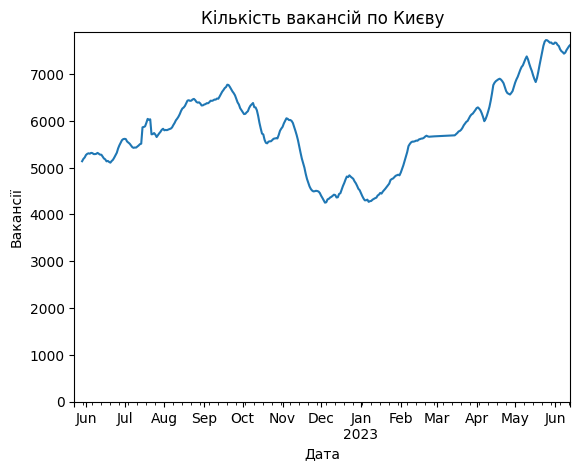

In [ ]:
df["rolling_mean"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling_mean
count,387.000000,381.000000
mean,5816.724806,5808.536745
std,912.306537,880.827433
min,4116.000000,4253.428571
25%,5227.500000,5270.714286
50%,5693.681818,5729.714286
75%,6420.000000,6391.857143
max,7920.000000,7730.714286


Друга частина


In [10]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json=response.json()

In [11]:
df_odesa=pd.DataFrame(data_json['data'])

In [12]:
df_odesa.head()

,at,val
0,2022-05-23,808
1,2022-05-24,788
2,2022-05-25,808
3,2022-05-26,877
4,2022-05-27,904


In [13]:
df_odesa["at"] = pd.to_datetime(df_odesa["at"])
df_odesa = df_odesa.rename(columns = {"at": "Дата" , "val": "Вакансії"})
df_odesa.set_index('Дата', inplace=True)
df_odesa["Вакансії"]=df_odesa['Вакансії'].replace(0, np.nan)
df_odesa['Вакансії']=df_odesa["Вакансії"].interpolate()
df_odesa['rolling_mean']=df_odesa['Вакансії'].rolling(window=7).mean()

In [14]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json=response.json()

In [15]:
df_lviv=pd.DataFrame(data_json['data'])

In [18]:
df_lviv.head()

,Вакансії,rolling_mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN


In [17]:
df_lviv["at"] = pd.to_datetime(df_lviv["at"])
df_lviv = df_lviv.rename(columns = {"at": "Дата" , "val": "Вакансії"})
df_lviv.set_index('Дата', inplace=True)
df_lviv["Вакансії"]=df_lviv['Вакансії'].replace(0, np.nan)
df_lviv['Вакансії']=df_lviv["Вакансії"].interpolate()
df_lviv['rolling_mean']=df_lviv['Вакансії'].rolling(window=7).mean()

In [19]:
df_lviv

,Вакансії,rolling_mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


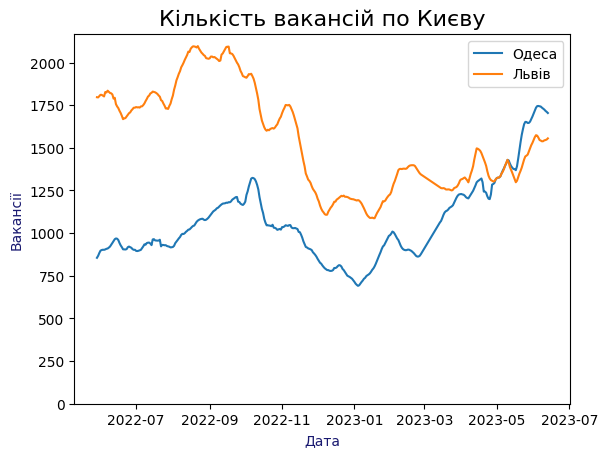

In [21]:
fig, axs = plt.subplots()
axs.plot(df_odesa.index, df_odesa['rolling_mean'], label="Одеса")
axs.plot(df_lviv.index, df_lviv['rolling_mean'], label="Львів")
plt.title("Кількість вакансій Одеса-Львів", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()


Порівняння (домашка)

In [41]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Харків")
data_json=response.json()

In [42]:
response=requests.get("https://uadata.net/work-positions/cities.json?o=Тернопіль")
data_json=response.json()

In [43]:
df_hark=pd.DataFrame(data_json['data'])


In [44]:
df_ter=pd.DataFrame(data_json['data'])

In [45]:
df_hark.head()

,at,val
0,2022-05-23,153
1,2022-05-24,173
2,2022-05-25,185
3,2022-05-26,191
4,2022-05-27,193


In [46]:
df_ter.head()

,at,val
0,2022-05-23,153
1,2022-05-24,173
2,2022-05-25,185
3,2022-05-26,191
4,2022-05-27,193


In [47]:
df_hark["at"] = pd.to_datetime(df_hark["at"])
df_hark = df_hark.rename(columns = {"at": "Дата" , "val": "Вакансії"})
df_hark.set_index('Дата', inplace=True)
df_hark["Вакансії"]=df_hark['Вакансії'].replace(0, np.nan)
df_hark['Вакансії']=df_hark["Вакансії"].interpolate()
df_hark['rolling_mean']=df_hark['Вакансії'].rolling(window=7).mean()

In [48]:
df_ter["at"] = pd.to_datetime(df_ter["at"])
df_ter = df_ter.rename(columns = {"at": "Дата" , "val": "Вакансії"})
df_ter.set_index('Дата', inplace=True)
df_ter["Вакансії"]=df_ter['Вакансії'].replace(0, np.nan)
df_ter['Вакансії']=df_ter["Вакансії"].interpolate()
df_ter['rolling_mean']=df_ter['Вакансії'].rolling(window=7).mean()

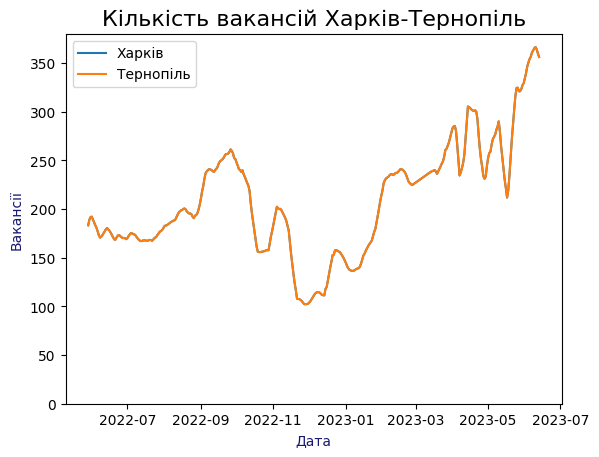

In [50]:
fig, axs = plt.subplots()
axs.plot(df_hark.index, df_hark['rolling_mean'], label="Харків")
axs.plot(df_ter.index, df_ter['rolling_mean'], label="Тернопіль")
plt.title("Кількість вакансій Харків-Тернопіль", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()